In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

from src.utils.constants import COP_HUB_BASE_NAME, BAND_NAMES_IN_COPERNICUS_HUB

In [9]:
patch_name = "S2_29-8-17_51RVQ"
number = "1"
separator = "_"
specific_patch_name = patch_name + separator + number

path_marida_tif = f"/data/anomaly-marine-detection/data/patches/{patch_name}/{specific_patch_name}.tif"
path_generated_tif = f"/data/anomaly-marine-detection/data/l1c_copernicus_hub/tif_final/{specific_patch_name}.tif"

In [10]:
def acquire_data(file_name):
    """Read an L1C Sentinel-2 image from a cropped TIF. The image is represented as TOA reflectance.
    Args:
        file_name (str): event ID.
    Raises:
        ValueError: impossible to find information on the database.
    Returns:
        np.array: array containing B8A, B11, B12 of a Seintel-2 L1C cropped tif.
        dictionary: dictionary containing lat and lon for every image point.
    """

    with rasterio.open(file_name) as raster:
        img_np = raster.read()
        sentinel_img = img_np.astype(np.float32)
        height = sentinel_img.shape[1]
        width = sentinel_img.shape[2]
        cols, rows = np.meshgrid(np.arange(width), np.arange(height))
        xs, ys = rasterio.transform.xy(raster.transform, rows, cols)
        lons = np.array(ys)
        lats = np.array(xs)
        coords_dict = {"lat": lats, "lon": lons}

    sentinel_img = sentinel_img.transpose(
        1, 2, 0
    )  # / 10000 + 1e-13  # Diving for the default quantification value

    return sentinel_img, coords_dict

In [11]:

img_marida_path = os.path.join(path_marida_tif)
img_marida, _ = acquire_data(img_marida_path)
print(img_marida.shape)

(256, 256, 11)


(256, 256, 13)


/tmp/ipykernel_13189/3748036028.py:8: RuntimeWarning: invalid value encountered in divide
  ax[0].imshow(img_shifted_cropped_cop_hub[:, :, i] / img_shifted_cropped_cop_hub[:, :, i].max())


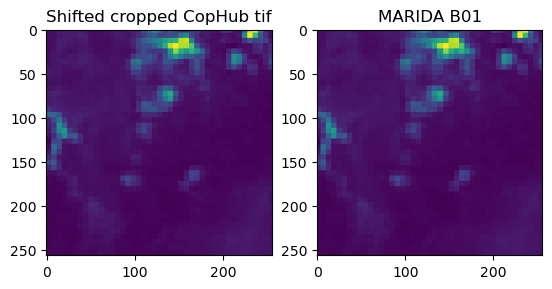

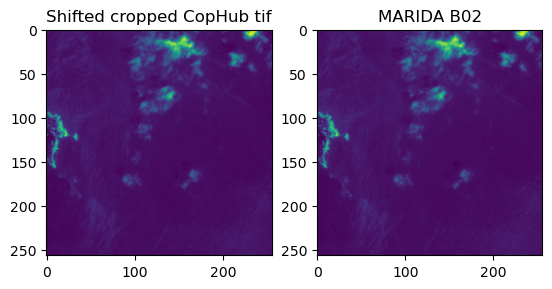

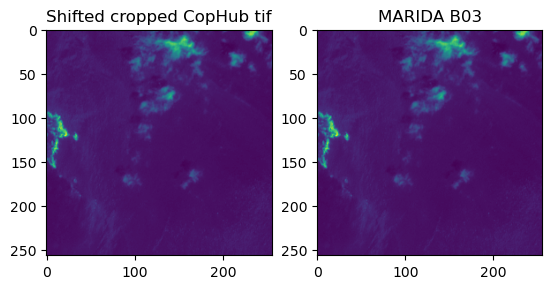

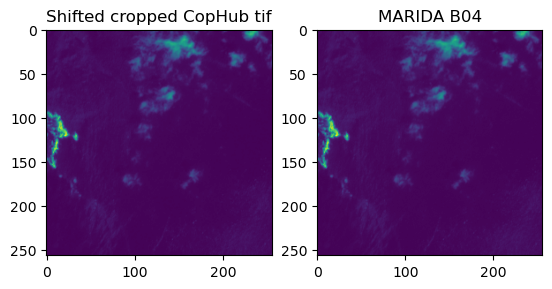

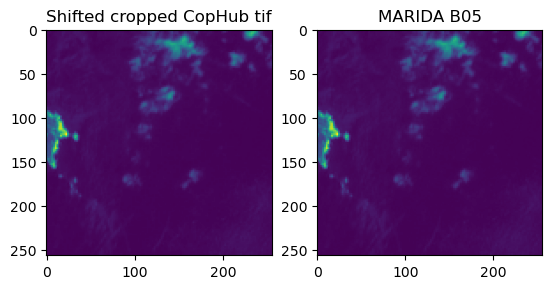

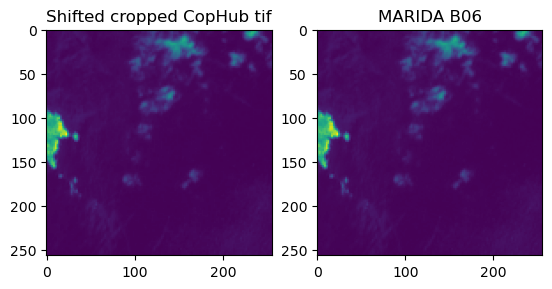

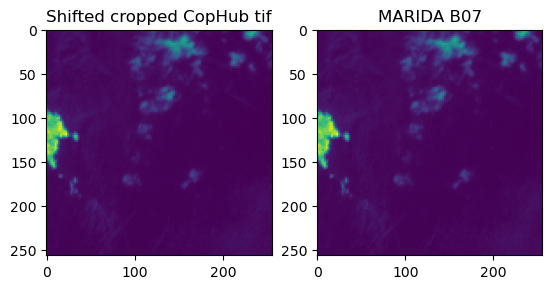

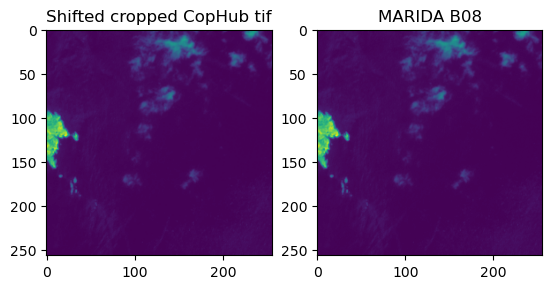

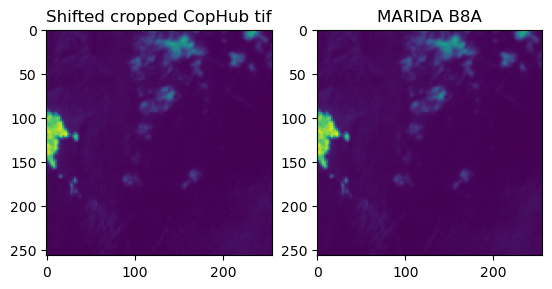

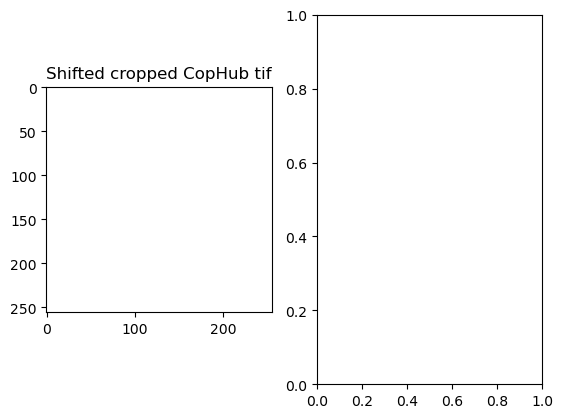

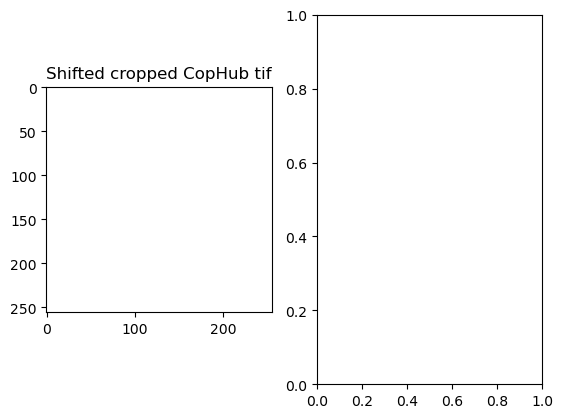

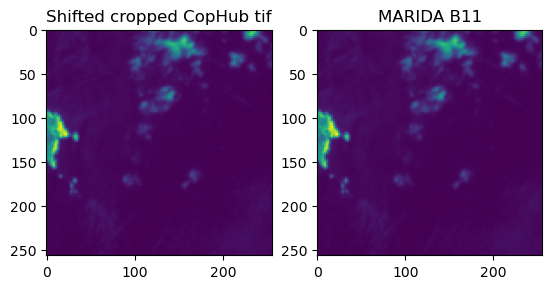

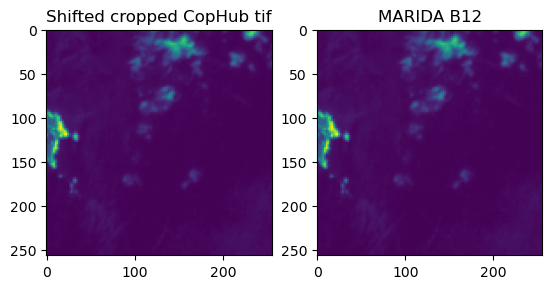

In [12]:
img_shifted_cropped_cop_hub_path = os.path.join(path_generated_tif)
img_shifted_cropped_cop_hub, _ = acquire_data(img_shifted_cropped_cop_hub_path)
print(img_shifted_cropped_cop_hub.shape)
j = 0
for i in range(13):
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title("Shifted cropped CopHub tif")
    ax[0].imshow(img_shifted_cropped_cop_hub[:, :, i] / img_shifted_cropped_cop_hub[:, :, i].max())
    
    if i == 9 or i == 10:
        pass
    else:
        ax[1].set_title("MARIDA " + BAND_NAMES_IN_COPERNICUS_HUB[i])
        ax[1].imshow(img_marida[:, :, j] / img_marida[:, :, j].max())
        j += 1
    